# Pedrestrain Data Integration to 20-Step Length

`This Jupyter Notebook preprocesses .npy data provided by Du and Hao Xue. It loads observation and prediction data, concatenates them with a total step length of 20, and saves the combined data into  single directories (orig and norm) . The notebook organizes all datasets for easy access and analysis.`

# 1. Initial Exploration
### If you are familier with the pedestrain traffic data (eth, hotel, univ, zara1 and zara2), you can skip this process.

In [16]:
import numpy as np

In [17]:
eth_test_obs = np.load('eth_test_obs.npy')

In [18]:
eth_test_obs.shape

(2614, 8, 2)

In [19]:
eth_orig_test_obs = np.load('eth_orig_test_obs.npy')

In [20]:
eth_orig_test_obs.shape

(2614, 8, 2)

In [21]:
np.max(np.abs(eth_test_obs - eth_orig_test_obs))

12.69520720661157

In [22]:
eth_test_obs[:5,:4]

array([[[0.73864033, 0.32913979],
        [0.66179917, 0.32660736],
        [0.63357901, 0.32477807],
        [0.58637669, 0.33357414]],

       [[0.66179917, 0.32660736],
        [0.63357901, 0.32477807],
        [0.58637669, 0.33357414],
        [0.52514793, 0.33662833]],

       [[0.63357901, 0.32477807],
        [0.58637669, 0.33357414],
        [0.52514793, 0.33662833],
        [0.49340942, 0.3612799 ]],

       [[0.58637669, 0.33357414],
        [0.52514793, 0.33662833],
        [0.49340942, 0.3612799 ],
        [0.4538261 , 0.36672353]],

       [[0.52514793, 0.33662833],
        [0.49340942, 0.3612799 ],
        [0.4538261 , 0.36672353],
        [0.41355985, 0.36891207]]])

In [23]:
np.load('eth_train_obs.npy').shape,
np.load('eth_train_pred.npy').shape,
np.load('eth_orig_train_obs.npy').shape,
np.load('eth_orig_val_obs.npy').shape,
np.load('eth_orig_train_pred.npy').shape,
np.load('eth_orig_val_pred.npy').shape

(5104, 12, 2)

## function to plot random trjectory to have a overview

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_trajectories(data):
    """
    Plot the given trajectories.
    
    Parameters:
    - data: numpy array of shape (n_samples, n_timesteps, 2).
    """
    if data.ndim != 3 or data.shape[2] != 2:
        raise ValueError("Input data must be a 3-dimensional array with the last dimension of size 2.")
    
    n_samples, _, _ = data.shape
    
    plt.figure(figsize=(12, 8))
    
    for i in range(n_samples):
        trajectory = data[i]
        plt.plot(trajectory[:, 0], trajectory[:, 1])  #, label=f'Trajectory {i+1}'
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Trajectories')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


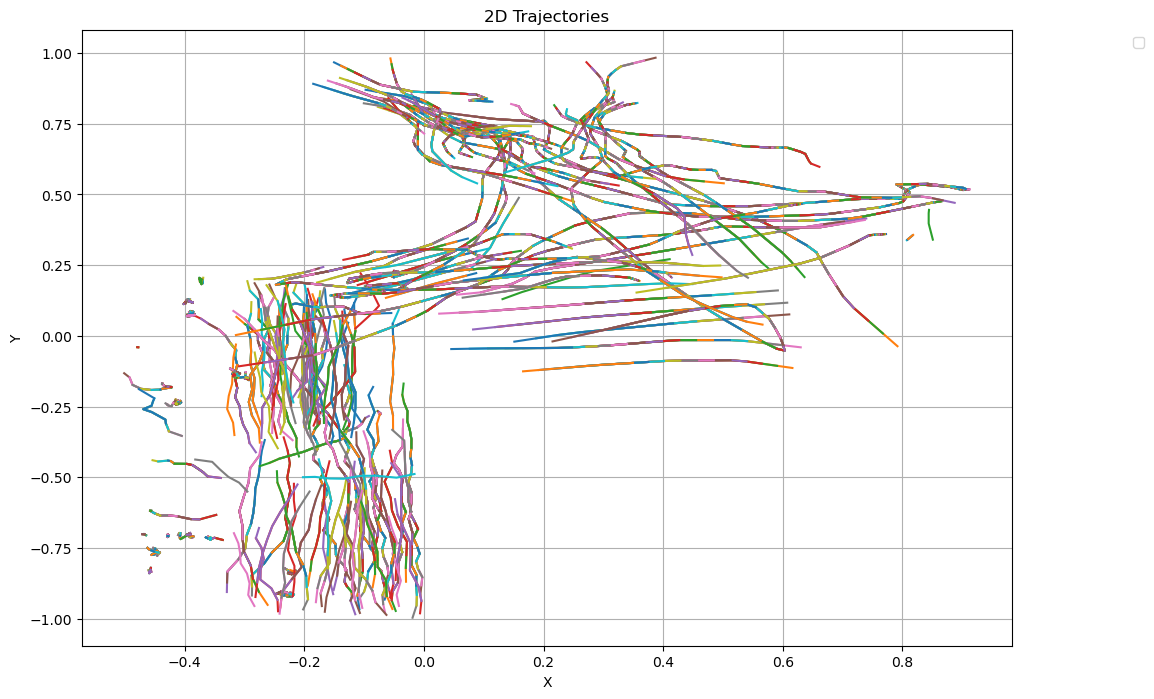

In [25]:
data = np.load('eth_train_obs.npy')  # load  the  trajectories 加载所有轨迹
plot_trajectories(data[0:3000])


# all_file_names_npy

In [26]:
all_file_names_npy = [
    # eth_original
    'eth_orig_train_obs.npy', 'eth_orig_train_pred.npy', 
    'eth_orig_val_obs.npy', 'eth_orig_val_pred.npy', 
    'eth_orig_test_obs.npy', 'eth_orig_test_pred.npy',

    # eth - norm
    'eth_train_obs.npy', 'eth_train_pred.npy', 
    'eth_val_obs.npy', 'eth_val_pred.npy', 
    'eth_test_obs.npy', 'eth_test_pred.npy',
    
    # hotel_original
    'hotel_orig_train_obs.npy', 'hotel_orig_train_pred.npy', 
    'hotel_orig_val_obs.npy', 'hotel_orig_val_pred.npy', 
    'hotel_orig_test_obs.npy', 'hotel_orig_test_pred.npy',

    # hotel - norm
    'hotel_train_obs.npy', 'hotel_train_pred.npy', 
    'hotel_val_obs.npy', 'hotel_val_pred.npy', 
    'hotel_test_obs.npy', 'hotel_test_pred.npy',

    # univ_original
    'univ_orig_train_obs.npy', 'univ_orig_train_pred.npy', 
    'univ_orig_val_obs.npy', 'univ_orig_val_pred.npy', 
    'univ_orig_test_obs.npy', 'univ_orig_test_pred.npy',

    # univ - norm
    'univ_train_obs.npy', 'univ_train_pred.npy', 
    'univ_val_obs.npy', 'univ_val_pred.npy', 
    'univ_test_obs.npy', 'univ_test_pred.npy',

    # zara1_original
    'zara1_orig_train_obs.npy', 'zara1_orig_train_pred.npy', 
    'zara1_orig_val_obs.npy', 'zara1_orig_val_pred.npy', 
    'zara1_orig_test_obs.npy', 'zara1_orig_test_pred.npy',

    # zara1 - norm
    'zara1_train_obs.npy', 'zara1_train_pred.npy', 
    'zara1_val_obs.npy', 'zara1_val_pred.npy', 
    'zara1_test_obs.npy', 'zara1_test_pred.npy',

    # zara2_original
    'zara2_orig_train_obs.npy', 'zara2_orig_train_pred.npy', 
    'zara2_orig_val_obs.npy', 'zara2_orig_val_pred.npy', 
    'zara2_orig_test_obs.npy', 'zara2_orig_test_pred.npy',

    # zara2 - norm
    'zara2_train_obs.npy', 'zara2_train_pred.npy', 
    'zara2_val_obs.npy', 'zara2_val_pred.npy', 
    'zara2_test_obs.npy', 'zara2_test_pred.npy'
]



#  print the shape divided by scene   将文件按每六个分组并打印 shape
for i in range(0, len(all_file_names_npy ), 6):
    group = all_file_names_npy [i:i+6]
    shapes = [np.load(f"{file}").shape for file in group]
    for file, shape in zip(group, shapes):
        print(f"{file}: {shape}")
    print("\n" + "-" * 50 + "\n")


eth_orig_train_obs.npy: (30627, 8, 2)
eth_orig_train_pred.npy: (30627, 12, 2)
eth_orig_val_obs.npy: (5104, 8, 2)
eth_orig_val_pred.npy: (5104, 12, 2)
eth_orig_test_obs.npy: (2614, 8, 2)
eth_orig_test_pred.npy: (2614, 12, 2)

--------------------------------------------------

eth_train_obs.npy: (30627, 8, 2)
eth_train_pred.npy: (30627, 12, 2)
eth_val_obs.npy: (5104, 8, 2)
eth_val_pred.npy: (5104, 12, 2)
eth_test_obs.npy: (2614, 8, 2)
eth_test_pred.npy: (2614, 12, 2)

--------------------------------------------------

hotel_orig_train_obs.npy: (32044, 8, 2)
hotel_orig_train_pred.npy: (32044, 12, 2)
hotel_orig_val_obs.npy: (5104, 8, 2)
hotel_orig_val_pred.npy: (5104, 12, 2)
hotel_orig_test_obs.npy: (1197, 8, 2)
hotel_orig_test_pred.npy: (1197, 12, 2)

--------------------------------------------------

hotel_train_obs.npy: (32044, 8, 2)
hotel_train_pred.npy: (32044, 12, 2)
hotel_val_obs.npy: (5104, 8, 2)
hotel_val_pred.npy: (5104, 12, 2)
hotel_test_obs.npy: (1197, 8, 2)
hotel_test_pred.

## Smmary of data rows

| data  |  (train) |  (val) |  (test) | train + val (Train_Full) |
|-------|---------------|-------------|-------------|---------------------------|
| eth   | 30627         | 5104        | 2614        | 35731                     |
| hotel | 32044         | 5104        | 1197        | 37148                     |
| univ  | 12562         | 2383        | 24334       | 14945                     |
| zara1 | 31265         | 4767        | 2356        | 36032                     |
| zara2 | 28764         | 3845        | 5910        | 32609                     |


# concatenate data

In [27]:
import numpy as np
import os

def concatenate_and_save(file_names, output_dir):
    # Ensure the output directory exists   -   确保输出目录存在
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for i in range(0, len(file_names), 2):
        # Load observation and prediction data   -   读取观察数据和预测数据
        obs_file = file_names[i]
        pred_file = file_names[i + 1]
        
        obs = np.load(obs_file)
        pred = np.load(pred_file)
        
        # Concatenate data      拼接数据
        combined_data = np.concatenate([obs, pred], axis=1)
        
        # Generate dataset name     生成数据集名称
        base_name = obs_file.split('_')[0]  # # Dataset name (e.g., eth, hotel)  数据集名称（例如 eth, hotel）
        if "orig" in obs_file:
            dataset_name = f"{base_name}_orig"
        else:
            dataset_name = base_name
        
        if "orig" in obs_file:
            data_type = obs_file.split('_')[2]
        else:
            data_type = obs_file.split('_')[1]

        output_file = os.path.join(output_dir, f"{dataset_name}_{data_type}_20.npy")
        
        # Save the concatenated data 保存拼接后的数据
        np.save(output_file, combined_data)
        print(f"Saved combined data to {output_file}")




In [28]:
# orig data
file_names_orig = [
    # ETH  orig  data
    'eth_orig_train_obs.npy', 'eth_orig_train_pred.npy', 
    'eth_orig_val_obs.npy', 'eth_orig_val_pred.npy', 
    'eth_orig_test_obs.npy', 'eth_orig_test_pred.npy',
    
    # HOTEL orig  data
    'hotel_orig_train_obs.npy', 'hotel_orig_train_pred.npy', 
    'hotel_orig_val_obs.npy', 'hotel_orig_val_pred.npy', 
    'hotel_orig_test_obs.npy', 'hotel_orig_test_pred.npy',
    
    # UNIV orig  data
    'univ_orig_train_obs.npy', 'univ_orig_train_pred.npy', 
    'univ_orig_val_obs.npy', 'univ_orig_val_pred.npy', 
    'univ_orig_test_obs.npy', 'univ_orig_test_pred.npy',
    
    # ZARA1 orig  data
    'zara1_orig_train_obs.npy', 'zara1_orig_train_pred.npy', 
    'zara1_orig_val_obs.npy', 'zara1_orig_val_pred.npy', 
    'zara1_orig_test_obs.npy', 'zara1_orig_test_pred.npy',
    
    # ZARA2 orig  data
    'zara2_orig_train_obs.npy', 'zara2_orig_train_pred.npy', 
    'zara2_orig_val_obs.npy', 'zara2_orig_val_pred.npy', 
    'zara2_orig_test_obs.npy', 'zara2_orig_test_pred.npy',
]

# loop to process each file
for dataset in ['eth', 'hotel', 'univ', 'zara1', 'zara2']:
    output_directory = f'{dataset}_orig'
    dataset_files = [fname for fname in file_names_orig if fname.startswith(dataset)]
    concatenate_and_save(dataset_files, output_directory)


Saved combined data to eth_orig\eth_orig_train_20.npy
Saved combined data to eth_orig\eth_orig_val_20.npy
Saved combined data to eth_orig\eth_orig_test_20.npy
Saved combined data to hotel_orig\hotel_orig_train_20.npy
Saved combined data to hotel_orig\hotel_orig_val_20.npy
Saved combined data to hotel_orig\hotel_orig_test_20.npy
Saved combined data to univ_orig\univ_orig_train_20.npy
Saved combined data to univ_orig\univ_orig_val_20.npy
Saved combined data to univ_orig\univ_orig_test_20.npy
Saved combined data to zara1_orig\zara1_orig_train_20.npy
Saved combined data to zara1_orig\zara1_orig_val_20.npy
Saved combined data to zara1_orig\zara1_orig_test_20.npy
Saved combined data to zara2_orig\zara2_orig_train_20.npy
Saved combined data to zara2_orig\zara2_orig_val_20.npy
Saved combined data to zara2_orig\zara2_orig_test_20.npy


In [29]:
# norm dara
file_names_norm = [
     # eth   norm
    'eth_train_obs.npy', 'eth_train_pred.npy', 
    'eth_val_obs.npy', 'eth_val_pred.npy', 
    'eth_test_obs.npy', 'eth_test_pred.npy',
      
    # hotel  norm
    'hotel_train_obs.npy', 'hotel_train_pred.npy', 
    'hotel_val_obs.npy', 'hotel_val_pred.npy', 
    'hotel_test_obs.npy', 'hotel_test_pred.npy',

    # univ norm 
    'univ_train_obs.npy', 'univ_train_pred.npy', 
    'univ_val_obs.npy', 'univ_val_pred.npy', 
    'univ_test_obs.npy', 'univ_test_pred.npy',

    # zara1 norm
    'zara1_train_obs.npy', 'zara1_train_pred.npy', 
    'zara1_val_obs.npy', 'zara1_val_pred.npy', 
    'zara1_test_obs.npy', 'zara1_test_pred.npy',

    # zara2 norm 
    'zara2_train_obs.npy', 'zara2_train_pred.npy', 
    'zara2_val_obs.npy', 'zara2_val_pred.npy', 
    'zara2_test_obs.npy', 'zara2_test_pred.npy'
]

# loop to deal with each file
for dataset in ['eth', 'hotel', 'univ', 'zara1', 'zara2']:
    output_directory = f'{dataset}_norm'
    dataset_files = [fname for fname in file_names_norm if fname.startswith(dataset)]
    concatenate_and_save(dataset_files, output_directory)


Saved combined data to eth_norm\eth_train_20.npy
Saved combined data to eth_norm\eth_val_20.npy
Saved combined data to eth_norm\eth_test_20.npy
Saved combined data to hotel_norm\hotel_train_20.npy
Saved combined data to hotel_norm\hotel_val_20.npy
Saved combined data to hotel_norm\hotel_test_20.npy
Saved combined data to univ_norm\univ_train_20.npy
Saved combined data to univ_norm\univ_val_20.npy
Saved combined data to univ_norm\univ_test_20.npy
Saved combined data to zara1_norm\zara1_train_20.npy
Saved combined data to zara1_norm\zara1_val_20.npy
Saved combined data to zara1_norm\zara1_test_20.npy
Saved combined data to zara2_norm\zara2_train_20.npy
Saved combined data to zara2_norm\zara2_val_20.npy
Saved combined data to zara2_norm\zara2_test_20.npy


<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\qinlo\AppData\Local\Temp\ipykernel_28036\3325464514.py:1: SyntaxWarning: invalid escape sequence '\e'
  data = np.load('eth_orig\eth_orig_train_20.npy')  # load  the  trajectories 加载所有轨迹
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


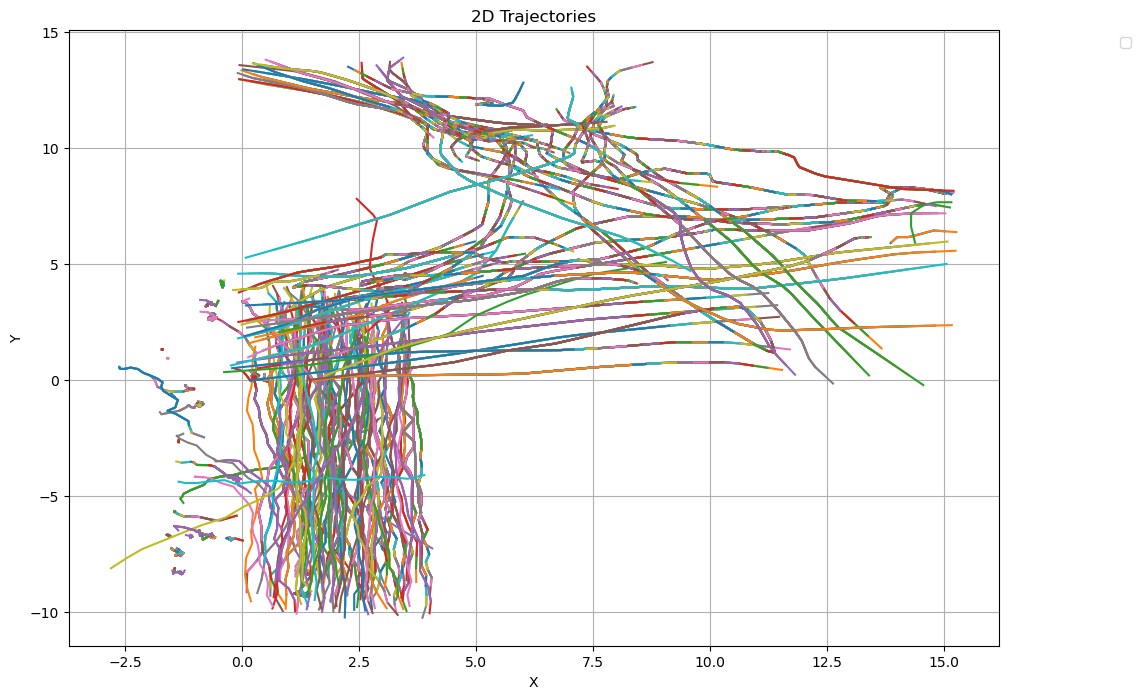

In [30]:
data = np.load('eth_orig\eth_orig_train_20.npy')  # load  the  trajectories 加载所有轨迹
plot_trajectories(data[0:3000])


# NOTE
`We now have two folders: data_orig and data_norm. The data_orig folder contains the raw data, while data_norm contains the normalized data. Each folder includes five scenarios: eth, hotel, univ, zara1, and zara2. Each scenario has datasets for 20 time steps: train, val, and test. The initial data consolidation has been completed.`